# Lab 4

Ali Tejani, amt3639

Caroline Yao

## Problem 1: PCA

### 1. Plot two 3D multivariate distributions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
# randomly sample distributions 20 times each
cov1 = [[.5,0,0],[0,.5,0],[0,0,0.7]]
cov2 = [[.5,0,0],[0,.5,0],[0,0,0.01]]
p1 = np.random.multivariate_normal([0,0,0],cov1,20)
p2 = np.random.multivariate_normal([1,1,1],cov2,20)
p1

array([[ 0.06819678, -0.15190515,  1.07485584],
       [-0.23847981,  0.90617282, -0.14136013],
       [ 0.0072953 ,  0.16916293,  0.07346657],
       [ 0.55823573, -1.32754416, -0.89171519],
       [-0.27899308,  0.48598863,  0.07068208],
       [ 0.59389035,  0.1053321 ,  1.78769219],
       [-0.18132604,  0.280676  ,  0.66143327],
       [-0.00803939, -0.03766891, -1.07953308],
       [-0.64775973,  1.38976661, -0.39573965],
       [-1.10048498, -0.37690808,  0.77433378],
       [-0.83730982, -0.17667249,  0.48788103],
       [-1.34712102, -0.04507068, -0.0984381 ],
       [-1.0183715 ,  0.57085037,  1.67584304],
       [-0.90397433,  0.08766593, -0.31351615],
       [-0.02507302,  0.06588091, -0.89789111],
       [ 0.88862718, -0.11734745, -0.25251419],
       [-1.21036191, -1.74519924,  1.05221976],
       [ 0.77892211,  0.22415197, -0.0941066 ],
       [ 0.08249331, -0.65029087, -0.37527208],
       [-0.00293839, -0.07890657, -1.4596452 ]])

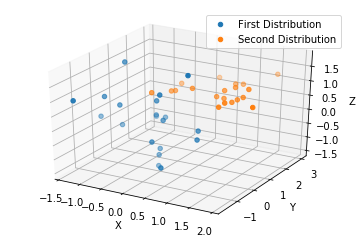

In [6]:
# plot on 3d graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p1[:,0],p1[:,1],p1[:,2],label='First Distribution')
ax.scatter(p2[:,0],p2[:,1],p2[:,2],label='Second Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

### 2. What do the points look like?

The distributions are centered around two different points: (0,0,0) and (1,1,1). The first distribution has a greater range of Z values than the second, which seems almost flat. Other than this, the distributions look vaguely similar in the X and Y directions. The first distribution looks like a ball in space and the second looks like a disk

### 3. Covariance of the new set

In [26]:
# this might be right
samples = np.concatenate((p1,p2)) # 40x3 matrix
print ('Samples Matrix')
print (samples)
print ("Actual Covariance Matrix")
print (np.cov(newP.T))
mean = np.mean(samples, axis=0)
norm = samples - mean
print ("Calculated Covariance Matrix")
covXY = np.dot(norm.T,norm)/(40-1)
print (covXY)

Samples Matrix
[[  6.81967823e-02  -1.51905147e-01   1.07485584e+00]
 [ -2.38479809e-01   9.06172816e-01  -1.41360128e-01]
 [  7.29529898e-03   1.69162928e-01   7.34665733e-02]
 [  5.58235733e-01  -1.32754416e+00  -8.91715190e-01]
 [ -2.78993079e-01   4.85988627e-01   7.06820793e-02]
 [  5.93890353e-01   1.05332097e-01   1.78769219e+00]
 [ -1.81326039e-01   2.80676003e-01   6.61433274e-01]
 [ -8.03939096e-03  -3.76689067e-02  -1.07953308e+00]
 [ -6.47759734e-01   1.38976661e+00  -3.95739646e-01]
 [ -1.10048498e+00  -3.76908083e-01   7.74333776e-01]
 [ -8.37309821e-01  -1.76672491e-01   4.87881033e-01]
 [ -1.34712102e+00  -4.50706827e-02  -9.84381031e-02]
 [ -1.01837150e+00   5.70850373e-01   1.67584304e+00]
 [ -9.03974329e-01   8.76659323e-02  -3.13516154e-01]
 [ -2.50730156e-02   6.58809131e-02  -8.97891110e-01]
 [  8.88627183e-01  -1.17347450e-01  -2.52514192e-01]
 [ -1.21036191e+00  -1.74519924e+00   1.05221976e+00]
 [  7.78922106e-01   2.24151966e-01  -9.41066020e-02]
 [  8.2493308

The formula for calculating covariance is:
$$\sum_{}^\wedge = \frac{1}{n}\times\sum_{i\in S}^nX^i\cdot \left(X^i\right)^T$$
where x is the point vector. 

We did this by 


### 4. PCA with rank 2

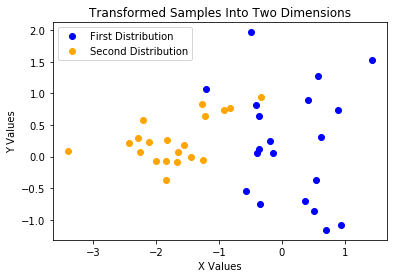

Yes, PCA made it easier to distinguish the two distributions in two dimensions and see their differences.


In [39]:
values,vectors = np.linalg.eig(covXY)
indices = np.argsort(values)[-2:]
vector1 = vectors[:,indices[1]] #eigenvector with the largest eigenvalue
vector2 = vectors[:,indices[0]] #eigenvector with the second largest eigenvalue'

newVectors = np.column_stack((vector1,vector2)) # 3x2 eigenvector matrix
transformed = np.dot(newVectors.T,samples.T) # 2x3 * 3x40 = 2x40 matrix

plt.plot(transformed[0,0:20],transformed[1,0:20],'o',color='blue',label='First Distribution');
plt.plot(transformed[0,20:],transformed[1,20:],'o',color='orange',label='Second Distribution');
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Transformed Samples Into Two Dimensions')
plt.legend()
plt.show()

print ('Yes, PCA made it easier to distinguish the two distributions in two dimensions and see their differences.')

## Problem 2: Low rank approximation of Mona Lisa

### 1. Low rank approximation

(603, 400)
Show rank k= 2,k= 5 and k= 10 approximation to Mona Lisa

rank = 2


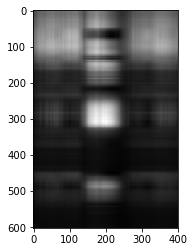


rank = 5


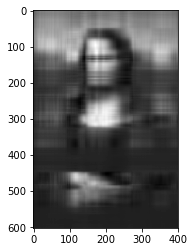


rank = 10


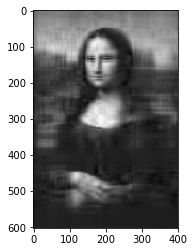

In [51]:
from PIL import Image
img = np.array(Image.open('inputs/mona_lisa.png').convert('L'))
print (img.shape)

print ('Show rank k= 2,k= 5 and k= 10 approximation to Mona Lisa')
u, s, v = np.linalg.svd(img,full_matrices=False)
for k in [2,5,10]:
    s2 = s.copy()
    s2[k:] = 0
    print ('\nRank =',k)
    lowRankImg = np.dot(np.dot(u, np.diag(s2)), v)
    plt.gray()
    plt.imshow(lowRankImg)
    plt.show()

### 2. Compressed Mona Lisa bits for each rank

Rank = x has ((x)(603) + x + (x)(400))(64) bits

Rank = 2 : 128512 bits

Rank = 5 : 321280 bits

Rank = 10 : 642560 bits